<a href="https://colab.research.google.com/github/gcombarGitHub/LINCIPH/blob/main/PaperLinciphFebreruay2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries



In [ ]:
#@title Installing libraries, this takes a while
install.packages("igraph")
install.packages("ggraph")
install.packages("ggvenn")
install.packages("gplots")
install.packages("UpSetR")
install.packages("VennDiagram")
install.packages("combinat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#@title Loading libraries
library(igraph); library(ggplot2); library(ggraph); library(ggvenn);
library(gplots); library(UpSetR); library(tidyverse);
library(VennDiagram); library(readxl); library(combinat)


# Functions
Here we will load three functions that we will use later

In [ ]:
#@title Functions
###################################################################
normalize <- function(x) {                                        # 
  return ((x - min(x)) / (max(x) - min(x)))                 }     #
###################################################################
CountCategories <- function(x){                                  #
   return ( length( table(Datos[,x])) )                     }     #
###################################################################
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

# Loading and preparing the data
We are going to load the data that we are going to work on, the file is: "SUJETOS Y CASOS_VF.xlsx"

In [ ]:
Datos <- read_excel("SUJETOS Y CASOS_VF.xlsx",sheet = "CASOS", skip = 1)
Datos2 <- read_excel("SUJETOS Y CASOS_VF.xlsx",sheet = "Variables Test_Politico")
Datos3 <- read_excel("SUJETOS Y CASOS_VF.xlsx", sheet = "Variables Entrevista_Semiestruc")

New names:
• `` -> `...18`
• `` -> `...19`


Now we extract the genre and combine the databases into one

In [ ]:
# Extracting
Datos$Genero <- substr(Datos$`ID SUJETO`,1,1)

# Merge
colnames(Datos)[1] <- "ID"
colnames(Datos2)[1] <- "ID"
colnames(Datos3)[1] <- "ID"
total <- merge(Datos,Datos3,by="ID")
total <- merge(total,Datos2,by="ID")

Removing and renaming columns

In [ ]:
total$`Primogénito Digital` <- NULL
total$`DÓNDE CRECIÓ`<- NULL
total$`Part Fam Redes` <- NULL
total$Discurso <- NULL
colnames(total)[21] <- "Movimiento Político"
total$...18 <- NULL
total$...19 <- NULL
total$`Uso de Facebook.y` <- NULL
total$Alcalde <- NULL
total$`Intención de voto` <- NULL
total$`Movimiento Político` <- NULL
total$Alcalde <- NULL
total$`Intención de voto`<- NULL
total$`Movimiento Político`<- NULL
total$Edad <- NULL

Renaming some NAs

In [ ]:
# Eliminemos los NA
for (i in c(1:ncol(total))){
  total[,i][is.na(total[,i])] <- "NA"
}

Now we will combine in groups some values of the variable "EDAD INICIO FB"

In [ ]:
total$Inicio_FB_1 <- NA
total$Inicio_FB_1[total$`EDAD INICIO FB` == "6"] <- "[6,8)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "6 o 7"] <- "[6,8)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "7"] <- "[6,8)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "7 a 11"] <- "[6,8)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "8"] <- "[8,10)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "8 a 10"] <- "[8,10)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "8 o 9"] <- "[8,10)"
##
total$Inicio_FB_1[total$`EDAD INICIO FB` == "9"] <- "[8,10)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "9 o 10"] <- "[8,10)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "10"] <- "[10,12)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "10 o 11"] <- "[10,12)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "11"] <- "[10,12)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "11 o 12"] <- "[10,12)"
##
total$Inicio_FB_1[total$`EDAD INICIO FB` == "12"] <- "[12,14)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "12 o 13"] <- "[12,14)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "13"] <- "[12,14)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "13-14"] <- "[12,14)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "14"] <- "[14,16)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "14 o 15"] <- "[14,16)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "15 o 14"] <- "[14,16)"
##
total$Inicio_FB_1[total$`EDAD INICIO FB` == "15"] <- "[14,16)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "15 o 16"] <- "[14,16)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "16"] <- "[16,18)"
total$Inicio_FB_1[total$`EDAD INICIO FB` == "18"] <- "[16,18)"

#################################################################
total$Inicio_FB_2 <- NA
total$Inicio_FB_2[total$`EDAD INICIO FB` == "6"] <- "[6,9)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "6 o 7"] <- "[6,9)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "7"] <- "[6,9)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "7 a 11"] <- "[6,9)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "8"] <- "[6,9)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "8 a 10"] <- "[6,9)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "8 o 9"] <- "[6,9)"
##
total$Inicio_FB_2[total$`EDAD INICIO FB` == "9"] <- "[9,12)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "9 o 10"] <- "[9,12)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "10"] <- "[9,12)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "10 o 11"] <- "[9,12)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "11"] <- "[9,12)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "11 o 12"] <- "[9,12)"
#
total$Inicio_FB_2[total$`EDAD INICIO FB` == "12"] <- "[12,15)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "12 o 13"] <- "[12,15)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "13"] <- "[12,15)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "13-14"] <- "[12,15)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "14"] <- "[12,15)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "14 o 15"] <- "[12,15)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "15 o 14"] <- "[12,15)"
##
total$Inicio_FB_2[total$`EDAD INICIO FB` == "15"] <- "[15,19)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "15 o 16"] <- "[15,19)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "16"] <- "[15,19)"
total$Inicio_FB_2[total$`EDAD INICIO FB` == "18"] <- "[15,19)"


Renaming and labels

In [ ]:
Datos1 <- Datos
Datos <- total
colnames(total)

# Labels
lab1 <- c("Interés activo", "Interesado pero no toma parte",
         "Poco Interés",  "Cero Interés")
lab2 <- c("Radical", "Gradual", "Defendida") 
lab3 <- c("Extrema Izquierda", "Izquierda", "Centro Izquierda",
          "Centro", "Centro Derecha", "Derecha", "Extrema Derecha") 
          
#The following are the variables we will study:

[1] "ID"                        "EDAD"                     
 [3] "EDAD INICIO FB"            "ACCESO PREVIO"            
 [5] "TIPO FAM 1"                "TIPO FAM 2"               
 [7] "Part Fam Pol"              "Exhaustividad"            
 [9] "Particip publicando"       "Ideología Pol"            
[11] "Vida Offline"              "Uso de Facebook.x"        
[13] "Genero"                    "Religión"                 
[15] "Practicante religión"      "TP 1. Interes en politica"
[17] "TP 2. Sociedad actual"     "TP 3. Postura politica"   
[19] "Inicio_FB_1"               "Inicio_FB_2"

---
# Response Variable Graphs

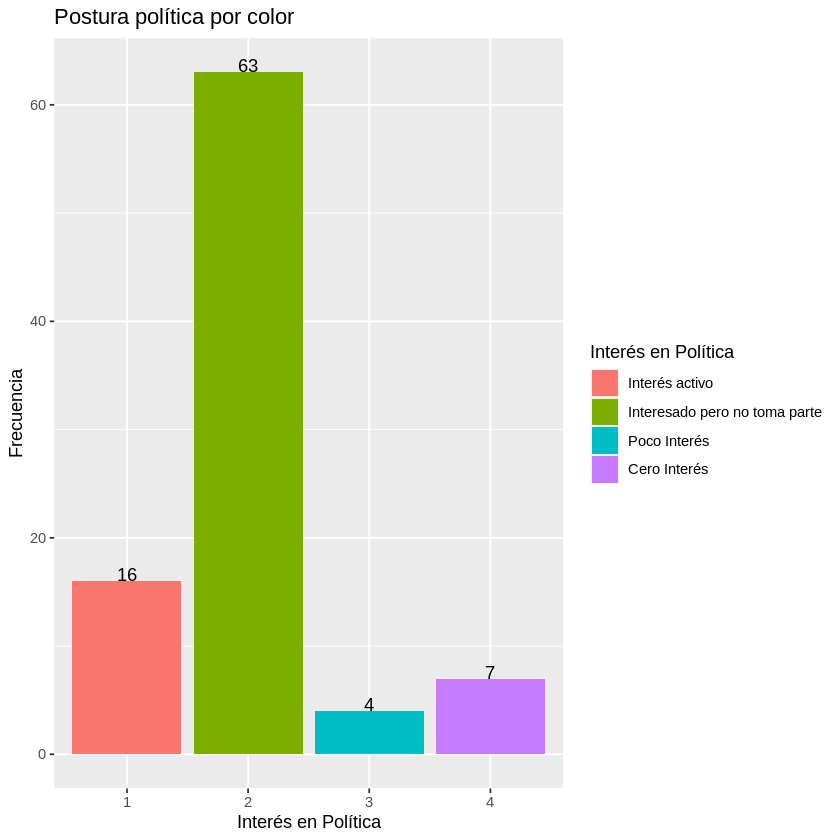

In [ ]:
Datos$Voto <- Datos$`TP 1. Interes en politica`; 
lab <- lab1; name_temp <- "Interés en Política"
p <- ggplot(Datos, aes(x=`TP 1. Interes en politica`))+
  geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
  labs(title="Postura política por color", y = "Frecuencia", x=name_temp)+
  geom_text(stat='count', aes(label=..count..), vjust=0)+
  scale_fill_discrete(name = name_temp, 
                      labels = lab)
print(p)

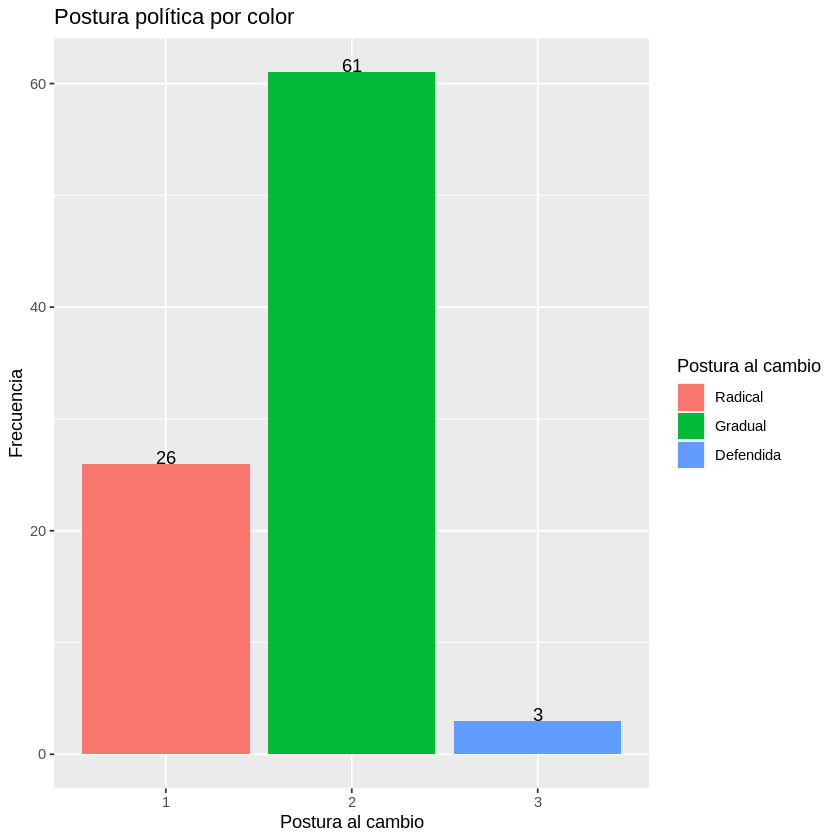

In [ ]:
Datos$Voto <- Datos$`TP 2. Sociedad actual`
lab <- lab2; name_temp <- "Postura al cambio"
p <- ggplot(Datos, aes(x=`TP 2. Sociedad actual`))+
  geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
  labs(title="Postura política por color", y = "Frecuencia", x=name_temp)+
  geom_text(stat='count', aes(label=..count..), vjust=0)+
  scale_fill_discrete(name = name_temp, 
                      labels = lab)
print(p)


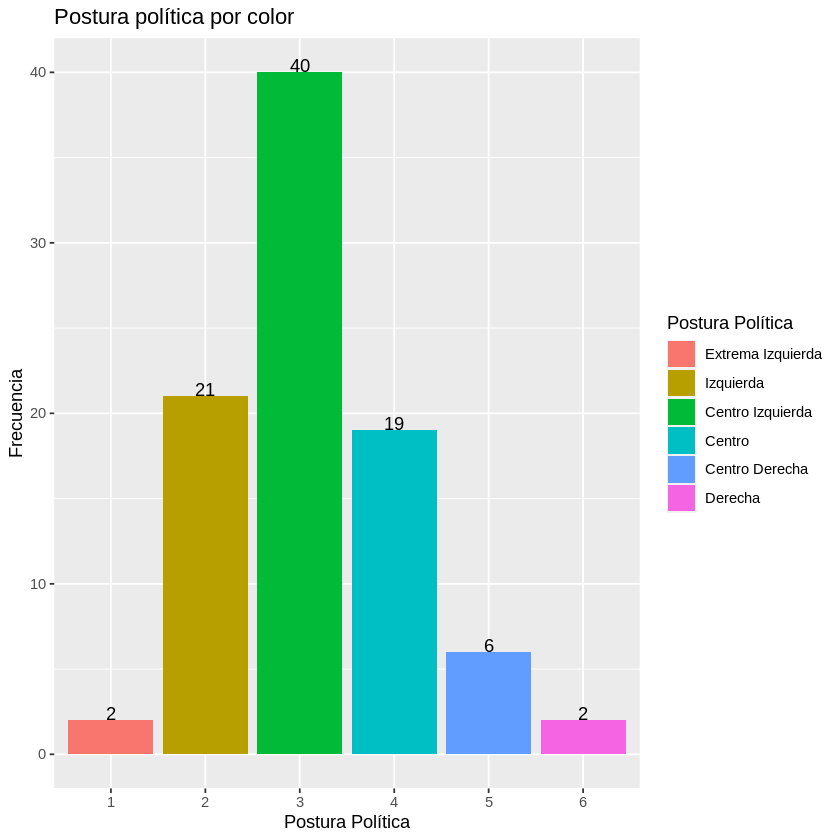

In [ ]:
Datos$Voto <- Datos$`TP 3. Postura politica`
lab <- lab3; name_temp <- "Postura Política"
p <- ggplot(Datos, aes(x=`TP 3. Postura politica`))+
  geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
  labs(title="Postura política por color", y = "Frecuencia", x=name_temp)+
  geom_text(stat='count', aes(label=..count..), vjust=0)+
  scale_fill_discrete(name = name_temp, 
                      labels = lab)
print(p)


Now we combine another variable: `TP 3. Postura politica` and plot it

In [ ]:
Datos$`TP 3. Postura politica`[Datos$`TP 3. Postura politica`=="1"] <- "1"
Datos$`TP 3. Postura politica`[Datos$`TP 3. Postura politica`=="2"] <- "1"
Datos$`TP 3. Postura politica`[Datos$`TP 3. Postura politica`=="3"] <- "1"
Datos$`TP 3. Postura politica`[Datos$`TP 3. Postura politica`=="4"] <- "2"
Datos$`TP 3. Postura politica`[Datos$`TP 3. Postura politica`=="5"] <- "3"
Datos$`TP 3. Postura politica`[Datos$`TP 3. Postura politica`=="6"] <- "3"

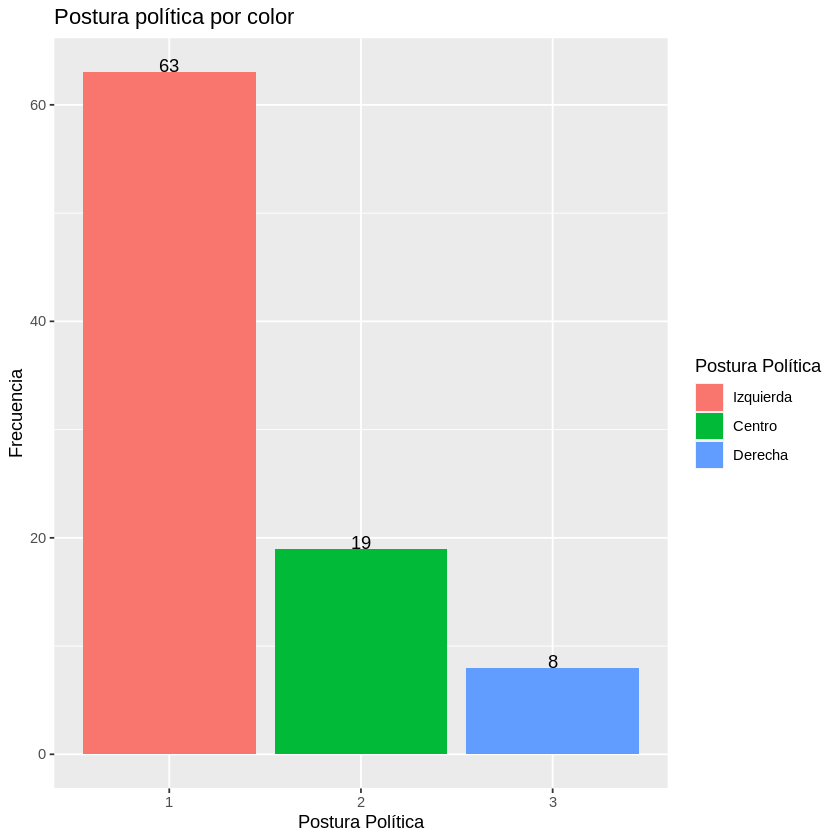

In [ ]:
Datos$Voto <- Datos$`TP 3. Postura politica`
lab3 <- c("Izquierda", "Centro", "Derecha")
lab <- lab3; name_temp <- "Postura Política"
p <- ggplot(Datos, aes(x=`TP 3. Postura politica`))+
  geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
  labs(title="Postura política por color", y = "Frecuencia", x=name_temp)+
  geom_text(stat='count', aes(label=..count..), vjust=0)+
  scale_fill_discrete(name = name_temp, 
                      labels = lab)
print(p)


The following code will save all the figures from the variables in "vec" colored by some important response variable

In [ ]:
vec <- c(c(2:16), c(20,21) )
print(colnames(Datos)[vec])
lab <- lab3 #lab?
name_side <- "Postura Política"
Datos$Voto <- Datos$`TP 3. Postura politica`


for(N in vec){#  N=4
  print(colnames(Datos)[N])
  x_temp <- as.vector(unlist( Datos[,N] ))
  name_temp <- colnames(Datos)[N]
  png(file=paste("Postura_",name_temp,".png") )
  p<-ggplot(Datos, aes(x=x_temp))+
    geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
    labs(title="Postura política por color", y = "Frecuencia", x=name_temp)+
    geom_text(stat='count', aes(label=..count..), vjust=0)+
    scale_fill_discrete(name = name_side, 
                        labels = lab)
  print(p)
  dev.off()
}

 [1] "EDAD"                      "EDAD INICIO FB"           
 [3] "ACCESO PREVIO"             "TIPO FAM 1"               
 [5] "TIPO FAM 2"                "Part Fam Pol"             
 [7] "Exhaustividad"             "Particip publicando"      
 [9] "Ideología Pol"             "Vida Offline"             
[11] "Uso de Facebook.x"         "Genero"                   
[13] "Religión"                  "Practicante religión"     
[15] "TP 1. Interes en politica" "Inicio_FB_2"              
[17] "Voto"                     
[1] "EDAD"
[1] "EDAD INICIO FB"
[1] "ACCESO PREVIO"
[1] "TIPO FAM 1"
[1] "TIPO FAM 2"
[1] "Part Fam Pol"
[1] "Exhaustividad"
[1] "Particip publicando"
[1] "Ideología Pol"
[1] "Vida Offline"
[1] "Uso de Facebook.x"
[1] "Genero"
[1] "Religión"
[1] "Practicante religión"
[1] "TP 1. Interes en politica"
[1] "Inicio_FB_2"
[1] "Voto"


# More graphs
Here we are going to make descriptive graphs of all the variables


In [ ]:
vec <- c(c(2:16), c(20,21) )
print(colnames(Datos)[vec])
lab <- lab3 


for(N in vec){
  print(colnames(Datos)[N])
  x_temp <- as.vector(unlist( Datos[,N] ))
  name_temp <- colnames(Datos)[N]
  png(file=paste("Descriptiva_",name_temp,".png") )
  p<-ggplot(Datos, aes(x=x_temp))+
    geom_bar(stat="count")+
    labs(title="", y = "Frecuencia", x=name_temp)+
    geom_text(stat='count', aes(label=..count..), vjust=0)+
    scale_fill_discrete(name = name_side, 
                        labels = lab)
  print(p)
  dev.off()
}

 [1] "EDAD"                      "EDAD INICIO FB"           
 [3] "ACCESO PREVIO"             "TIPO FAM 1"               
 [5] "TIPO FAM 2"                "Part Fam Pol"             
 [7] "Exhaustividad"             "Particip publicando"      
 [9] "Ideología Pol"             "Vida Offline"             
[11] "Uso de Facebook.x"         "Genero"                   
[13] "Religión"                  "Practicante religión"     
[15] "TP 1. Interes en politica" "Inicio_FB_2"              
[17] "Voto"                     
[1] "EDAD"
[1] "EDAD INICIO FB"
[1] "ACCESO PREVIO"
[1] "TIPO FAM 1"
[1] "TIPO FAM 2"
[1] "Part Fam Pol"
[1] "Exhaustividad"
[1] "Particip publicando"
[1] "Ideología Pol"
[1] "Vida Offline"
[1] "Uso de Facebook.x"
[1] "Genero"
[1] "Religión"
[1] "Practicante religión"
[1] "TP 1. Interes en politica"
[1] "Inicio_FB_2"
[1] "Voto"


#Wrong plots
If some labels in the x-axis are wrong, for example for variables 12 and 18, here I will plot it again rotating 45 degrees the labels in the x-ais

[1] "Uso de Facebook.x"
[1] "TP 3. Postura politica"


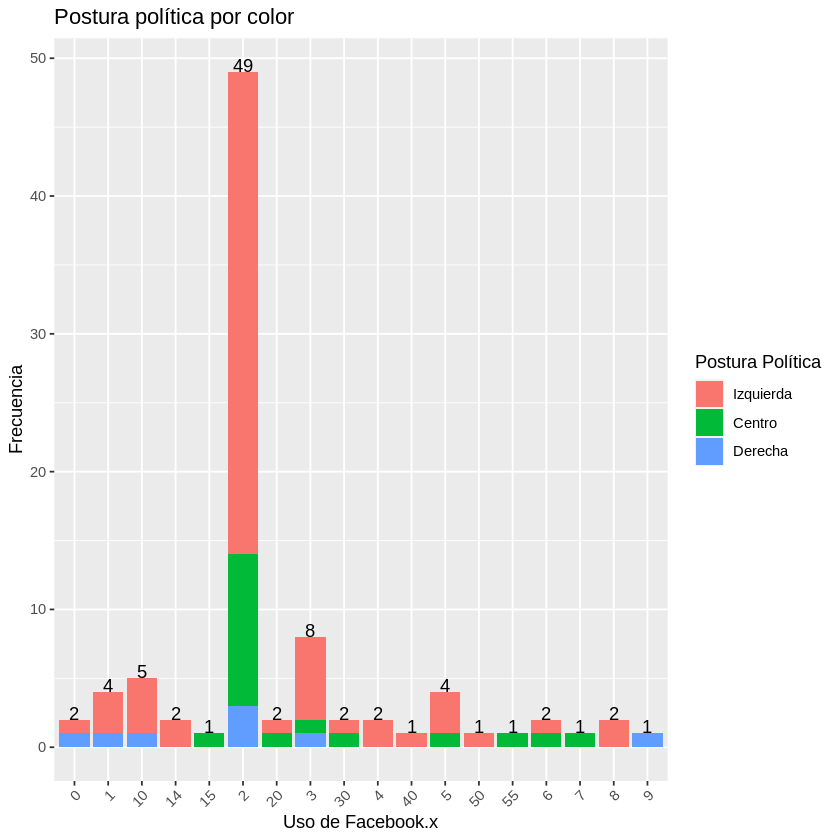

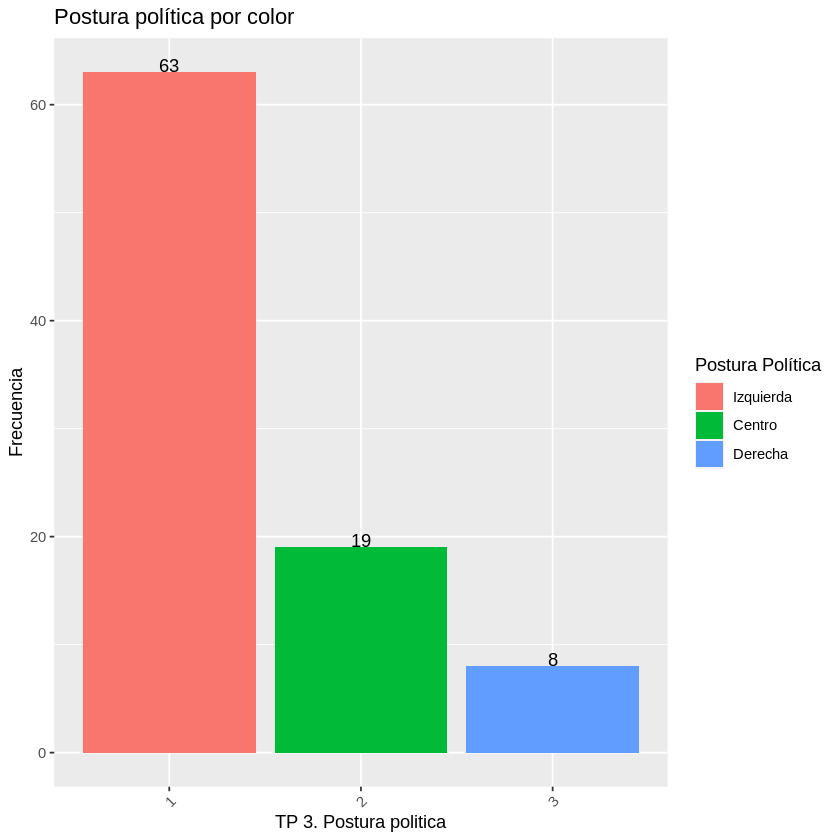

In [ ]:
vec <- c(12, 18)  # Wrong plots
lab <- lab3 
name_side <- "Postura Política"
Datos$Voto <- Datos$`TP 3. Postura politica`

for(N in vec){#  N=4
  print(colnames(Datos)[N])
  x_temp <- as.vector(unlist( Datos[,N] ))
  name_temp <- colnames(Datos)[N]
#  png(file=paste("Postura_",name_temp,".png") )
  p<-ggplot(Datos, aes(x=x_temp))+
    geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
    labs(title="Postura política por color", y = "Frecuencia", x=name_temp)+
    geom_text(stat='count', aes(label=..count..), vjust=0)+
    theme(axis.text.x = element_text(angle = 45, vjust = +1, hjust=1))+
    scale_fill_discrete(name = name_side, 
                        labels = lab)
  print(p)
#  dev.off()
}


#Classification
Here we will implement our algorith of exahustive classification. Firts we decide which variable are going to be independent and which ones are going to be response.

In the dataframe Resumen we will collect the information for the graph.

In [ ]:
Datos$Voto <- NULL #Datos$`TP 1. Interes en politica`
print(colnames(Datos))
Predecir <- c(16,17,18)  # Variables a predecir. 
categorias <- c(2:20)    # Todas las variabels.
categorias <- categorias[-match(Predecir, categorias)] # Quitamos las Predecir

ValoresCategoricos <- categorias

Resumen <- data.frame(matrix(ncol = 12, nrow = 0))
colnames(Resumen) <- c('N_Caracteristicas', 
                       'K_Subconjunto',
                       'Grupos_esperados',
                       'Grupos_obtenido',
                       "Grupos",
                       'Max_Prop_Interes',
                       'Max_Prop_Sociedad',
                       'Max_Prop_Postura',
                       'Mean_Prop_Interes',
                       'Mean_Prop_Sociedad',
                       'Mean_Prop_Postura',
                       'Clasificados_en_Grupos'
                       )

N <-  length(ValoresCategoricos) -1


 [1] "ID"                        "EDAD"                     
 [3] "EDAD INICIO FB"            "ACCESO PREVIO"            
 [5] "TIPO FAM 1"                "TIPO FAM 2"               
 [7] "Part Fam Pol"              "Exhaustividad"            
 [9] "Particip publicando"       "Ideología Pol"            
[11] "Vida Offline"              "Uso de Facebook.x"        
[13] "Genero"                    "Religión"                 
[15] "Practicante religión"      "TP 1. Interes en politica"
[17] "TP 2. Sociedad actual"     "TP 3. Postura politica"   
[19] "Inicio_FB_1"               "Inicio_FB_2"              


Here P is going to be the number of subgroups that we will consider, in this case groups of 2 and 3 characteristics. If you choose P too big you will overfit the model, because you will have too many groups of one element.

In [ ]:
for (P in c(2:3)){                        # P tendrá el valor de cuantos subconjuntos  #
  ValoresCategoricos <- categorias        # Reiniciamos las categorias 
  subconj <- combn(ValoresCategoricos, P) # K va a recorrer todos los subconjuntos
  for( K in c(1:length(subconj[1,])) ){   # ciclo por subconjuntos, ejemplo K=1
    ValoresCategoricos <- subconj[,K]     # Estos son las grupos de caracteristicas a comparar
      # b: ValoresCategoricos <- c(3,5)
    CompararDatos <- Datos[, ValoresCategoricos, drop=FALSE] #Datos a comparar
    rownames(CompararDatos) <- Datos$ID
    # Vamos a contar cuantos grupos máximo esperamos
      # b: length(table(Datos[,ValoresCategoricos[1]]))
      # b: length(table(Datos[,ValoresCategoricos[2]]))
      # b: Ejemplo: P=2; K=23;  colnames(Datos)[ValoresCategoricos];
    NumCate <- prod(sapply(lapply(ValoresCategoricos, CountCategories), sum))    
    #########################################################
    # En este punto, contar grupos dados por las categorias #
    # Por cada fila ir agrupando/eliminado las iguales      #
    # Las categorias con cero elementos son importantes     #
    # Contas las categorias con dos o mas elementos         #
    #########################################################
    Grupos <- list(); tam_Groups <- c();
    while (nrow(CompararDatos) > 0) {
      grupo_i = c(rownames(CompararDatos)[1])                         # Cada grupo
      temp <- CompararDatos[1,]             # Comparo con el primero
      CompararDatos <- CompararDatos[-1,, drop=FALSE]   # lo quito
      M <- nrow(CompararDatos)              # Cantidad de sujetos
      v <- c()                             # vector para quitar los añadidos
      if(M>0){
        for(i in c(1:M)){                   # lo comparo con todos los demas
          if (sum(temp == CompararDatos[i,], na.rm = T)==P){ # Si son iguales en todo
            grupo_i = c(grupo_i, rownames(CompararDatos)[i])           # lo añado al grupo
            #print(rownames(CompararDatos)[i])
            v <- c(v,i)
          }
        }
      }
      if(length(v)){CompararDatos <- CompararDatos[-v,, drop=FALSE]} # quito el añadido 
      Grupos[[ length(Grupos)+1 ]] <- grupo_i # Voy guardando los grupos
    }
    ###############################################################
    # Los grupos de longitud 1 hay que quitarlos
    # generalmente provienen de NAs
    # inflan los promedios porque dan 100%
    j = 1
    for (i in c(1:length(Grupos) )){
      if(length(Grupos[[j]]) == 1){
        Grupos <- Grupos[-j]
      }
      else{
        tam_Groups <- c(tam_Groups,length(Grupos[[j]]))
        j = j+1
      } 
    }
    
    


    ##################################################################
    # Ahora vamos a medir en cada grupos qué tanto dicen
    # sobre las variables que queremos medir:
    #Predecir <- c(20,21,22) # 22, 23 y 24 son los valores a comparar/Predecir
    CompararDatos <- Datos[, c(ValoresCategoricos, Predecir)] #Datos a comparar
    rownames(CompararDatos) <- Datos$ID
    
    gr1_max <- c() # Guardamos las probabilidades maximas de los grupos.
    gr2_max <- c()
    gr3_max <- c()
    
    #gr1_mean <- c() # Guardamos las probabilidades promedio de los grupos.
    #gr2_mean <- c()
    #gr3_mean <- c()
    for(i in c(1:length(Grupos) )){
      r <- c()        # Acá guardaremos cuantos coinciden. 
      for(j in c(1:length(Grupos[[i]]) )){
        # Vamos a extraer los índices de cada grupo
        r <- c(r, which(row.names(CompararDatos) == Grupos[[i]][j]) )
      }
      gr1_max <- c(gr1_max, max(table(CompararDatos$`TP 1. Interes en politica`[r]))/length(r) )
      gr2_max <- c(gr2_max, max(table(CompararDatos$`TP 2. Sociedad actual`[r]))/length(r)     )
      gr3_max <- c(gr3_max, max(table(CompararDatos$`TP 3. Postura politica`[r]))/length(r)    )
      #Guardamos los promedios. 
      #gr1_mean <- c(gr1_mean, mean(table(CompararDatos$`TP 1. Interes en politica`[r]))/length(r) )
      #gr2_mean <- c(gr2_mean, mean(table(CompararDatos$`TP 2. Sociedad actual`[r]))/length(r)     )
      #gr3_mean <- c(gr3_mean, mean(table(CompararDatos$`TP 3. Postura politica`[r]))/length(r)    )
      #print(r1)
    }
    
    
    # Este resumen es para después cuando tenga todos los grupos. 
    Resumen[nrow(Resumen) + 1,] = 
      c(P, # Caracteristicas 
        K, # Subconjunto 
        NumCate, # Grupos_esperado 
        length(Grupos), # Grupos_obtenido
        #paste(Grupos),
        "Contruccion",
        max(gr1_max), # max Prop_Interes
        max(gr2_max), # max Prop_Sociedad
        max(gr3_max), # max_Postura
        mean(gr1_max), # mean_Interes
        mean(gr2_max), # Prop_Sociedad
        mean(gr3_max), # Prop_Postura
        sum(tam_Groups)/nrow(Datos) #Porcetaje de calsificados en grupos.
        )
    
  }
  print(paste("Hecho:", P));
}

[1] "Hecho: 2"
[1] "Hecho: 3"


Now the dataframe Resumen will have all the possible groups with all the measurements that we compute to determine which group is best

In [ ]:
head(Resumen)

,N_Caracteristicas,K_Subconjunto,Grupos_esperados,Grupos_obtenido,Grupos,Max_Prop_Interes,Max_Prop_Sociedad,Max_Prop_Postura,Mean_Prop_Interes,Mean_Prop_Sociedad,Mean_Prop_Postura,Clasificados_en_Grupos
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,1,200,19,Contruccion,1,1,1,0.732456140350877,0.768421052631579,0.701754385964912,0.6
2,2,2,32,24,Contruccion,1,1,1,0.751686507936508,0.700297619047619,0.719047619047619,0.944444444444444
3,2,3,32,15,Contruccion,1,1,1,0.73525012025012,0.697068302068302,0.741810966810967,0.933333333333333
4,2,4,32,21,Contruccion,1,1,1,0.742819349962207,0.746258503401361,0.718291761148904,0.988888888888889
5,2,5,24,18,Contruccion,1,1,1,0.740079365079365,0.737147266313933,0.748941798941799,0.955555555555556
6,2,6,40,19,Contruccion,1,1,1,0.71516290726817,0.728195488721805,0.722681704260652,0.877777777777778


Now some graphs from Resumen:

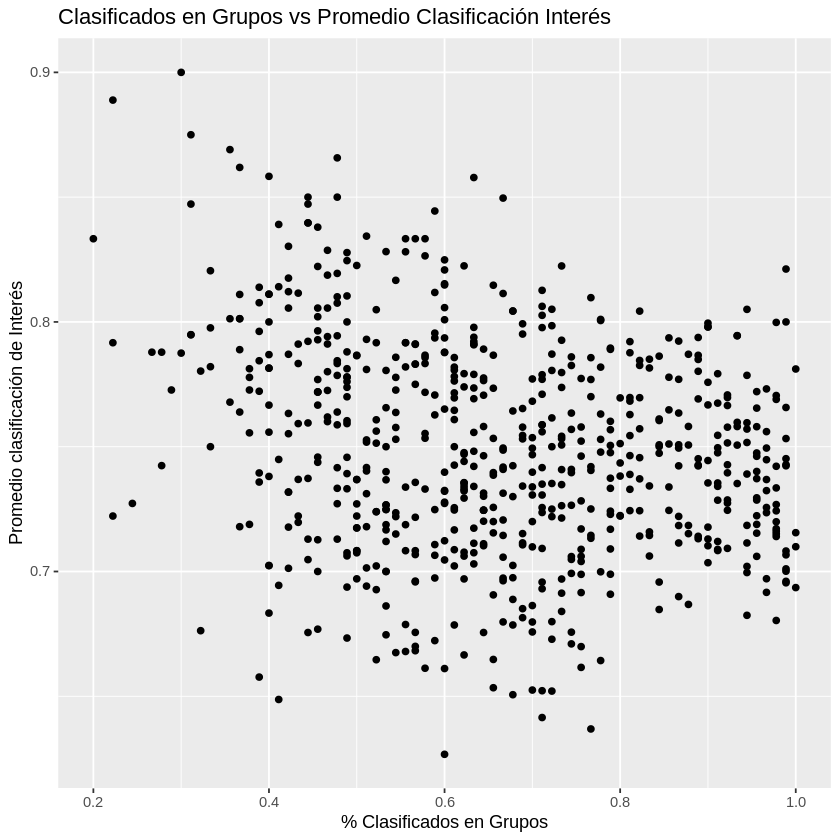

In [ ]:
Resumen$Clasificados_en_Grupos <- as.numeric(Resumen$Clasificados_en_Grupos)
Resumen$Mean_Prop_Interes <- as.numeric(Resumen$Mean_Prop_Interes)
Resumen$N_Caracteristicas <- as.factor(Resumen$N_Caracteristicas)

ggplot(Resumen, aes() )  +  ggtitle("Clasificados en Grupos vs Promedio Clasificación Interés")+
     geom_point(aes(x = `Clasificados_en_Grupos`, y= Mean_Prop_Interes))+
     labs(y="Promedio clasificación de Interés",
          x="% Clasificados en Grupos")



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


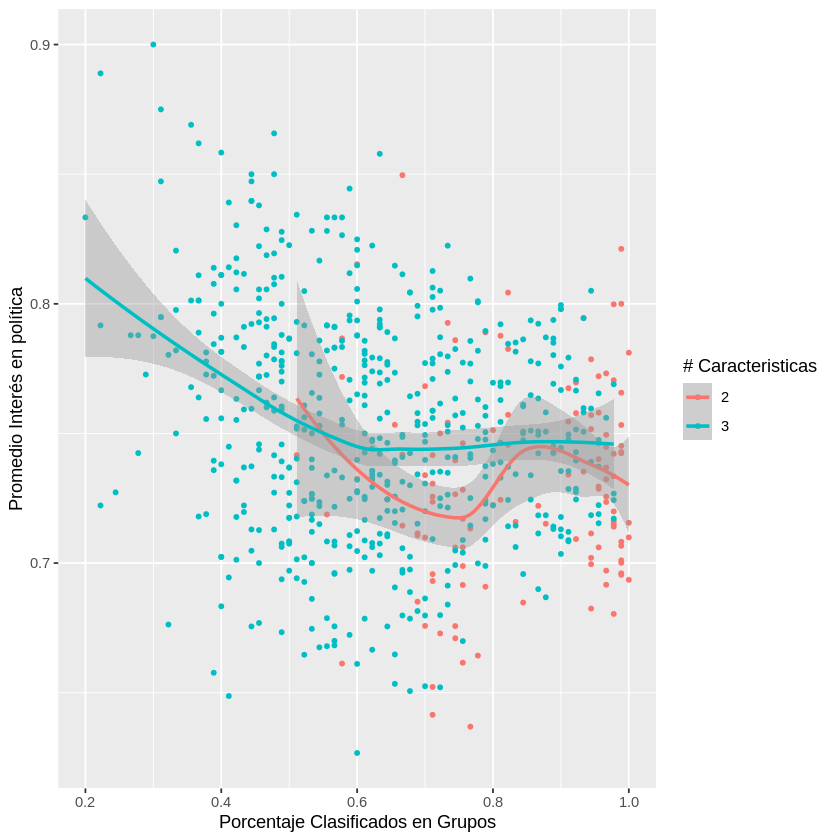

In [ ]:
ggplot(Resumen, aes(Clasificados_en_Grupos, Mean_Prop_Interes, col=N_Caracteristicas)) + 
  geom_point(size = 1)+  # change size and colour
  labs(y = "Promedio Interés en política", x = "Porcentaje Clasificados en Grupos", col="# Caracteristicas")+
  geom_smooth()

In [ ]:
i <- c(which( 0.98 <= Resumen$Clasificados_en_Grupos ))
j <- which( max(Resumen$Mean_Prop_Interes[i]) == Resumen$Mean_Prop_Interes[i] )
i <- i[j]
Resumen[i,]

,N_Caracteristicas,K_Subconjunto,Grupos_esperados,Grupos_obtenido,Grupos,Max_Prop_Interes,Max_Prop_Sociedad,Max_Prop_Postura,Mean_Prop_Interes,Mean_Prop_Sociedad,Mean_Prop_Postura,Clasificados_en_Grupos
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
93,2,93,15,12,Contruccion,1,1,1,0.8211945,0.80524013024013,0.717490842490842,0.9888889


#Color para el mejor grupo para Interés

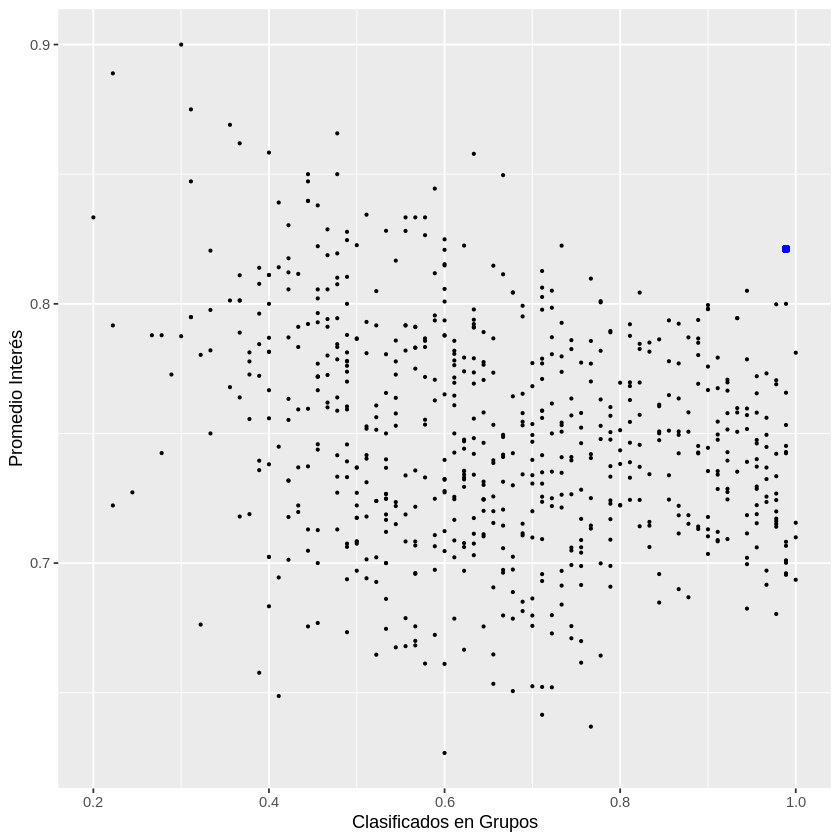

In [ ]:
a = Resumen$Clasificados_en_Grupos[i]
b = Resumen$Mean_Prop_Interes[i]
ggplot(Resumen, aes(Clasificados_en_Grupos, Mean_Prop_Interes)) + 
  geom_point(size = 0.5) + # change size and colour
  labs(y = "Promedio Interés", x = "Clasificados en Grupos")+
  #  geom_smooth()+
#  geom_segment(aes(x = x_1, y = y_1, xend = x_2, yend = y_2), col = "red")+
  geom_point(aes(x=a, y=b), col = "blue")


#Encontremos el mejor grupo para interés:

In [ ]:
Resumen[i,]
#Verificar que es 93 y k=2

,N_Caracteristicas,K_Subconjunto,Grupos_esperados,Grupos_obtenido,Grupos,Max_Prop_Interes,Max_Prop_Sociedad,Max_Prop_Postura,Mean_Prop_Interes,Mean_Prop_Sociedad,Mean_Prop_Postura,Clasificados_en_Grupos
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
93,2,93,15,12,Contruccion,1,1,1,0.8211945,0.80524013024013,0.717490842490842,0.9888889


In [ ]:
P = 2
K = 93
ValoresCategoricos <- categorias
subconj <- combn(ValoresCategoricos, P)
colnames(Datos)[subconj[,K]]
Predecir <- c(16,17,18)  # Variables a predecir. 
categorias <- c(2:20)    # Todas las variabels.
categorias <- categorias[-match(Predecir, categorias)] # Quitamos las Predecir
ValoresCategoricos <- categorias
CompararDatos <- Datos[, subconj[,K]] #Datos a comparar
rownames(CompararDatos) <- Datos$ID
Grupos <- list(); tam_Groups <- c();
while (nrow(CompararDatos) > 0) {
  grupo_i = c(rownames(CompararDatos)[1])                         # Cada grupo
  temp <- CompararDatos[1,]             # Comparo con el primero
  CompararDatos <- CompararDatos[-1,]   # lo quito
  M <- nrow(CompararDatos)              # Cantidad de sujetos
  v <- c()                             # vector para quitar los añadidos
  if(M>0){
    for(i in c(1:M)){                   # lo comparo con todos los demas
      if (sum(temp == CompararDatos[i,], na.rm = T)==P){ # Si son iguales en todo
        grupo_i = c(grupo_i, rownames(CompararDatos)[i])           # lo añado al grupo
        #print(rownames(CompararDatos)[i])
        v <- c(v,i)
      }
    }
  }
  if(length(v)){CompararDatos <- CompararDatos[-v,]} # quito el añadido 
  Grupos[[ length(Grupos)+1 ]] <- grupo_i # Voy guardando los grupos
}

[1] "Ideología Pol" "Vida Offline"

In [ ]:
table(Datos$`Ideología Pol`)


 Ausencia        NA Presencia 
       31        10        49 

In [ ]:
table(Datos$`Vida Offline`)


Frecuente        NA      Nula Ocasional     Total 
       12        20        20        31         7 

In [ ]:
length(Grupos)

[1] 13

#####################################

 Los grupos de longitud 1 hay que quitarlos
 generalmente provienen de NAs
 inflan los promedios porque dan 100%

In [ ]:
j = 1
for (i in c(1:length(Grupos) )){
  if(length(Grupos[[j]]) == 1){
    Grupos <- Grupos[-j]
  }
  else{
    tam_Groups <- c(tam_Groups,length(Grupos[[j]]))
    j = j+1
  } 
}

In [ ]:
Datos$Grupo <- NA
for (i in c(1:nrow(Datos))){
  for(j in c(1:length(Grupos) ) ){
    if (Datos$ID[i] %in% Grupos[[j]] ){
      #print(j)
      Datos$Grupo[i] <- j
    }
  }
}

#Estos son los grupos




In [ ]:
for (i in c(1:length(Grupos)) ){
   print(paste("Grupo", i, "->", Datos$ID[Datos$Grupo == i]))
}

 [1] "Grupo 1 -> H01" "Grupo 1 -> NA"  "Grupo 1 -> H11" "Grupo 1 -> H25"
 [5] "Grupo 1 -> H29" "Grupo 1 -> H31" "Grupo 1 -> H34" "Grupo 1 -> H37"
 [9] "Grupo 1 -> H40" "Grupo 1 -> H48" "Grupo 1 -> M48"
 [1] "Grupo 2 -> H02" "Grupo 2 -> H06" "Grupo 2 -> NA"  "Grupo 2 -> H17"
 [5] "Grupo 2 -> H45" "Grupo 2 -> H46" "Grupo 2 -> M11" "Grupo 2 -> M12"
 [9] "Grupo 2 -> M19" "Grupo 2 -> M32"
[1] "Grupo 3 -> H03" "Grupo 3 -> NA"  "Grupo 3 -> H47" "Grupo 3 -> M31"
[5] "Grupo 3 -> M40" "Grupo 3 -> M42" "Grupo 3 -> M44" "Grupo 3 -> M54"
 [1] "Grupo 4 -> H04" "Grupo 4 -> NA"  "Grupo 4 -> H13" "Grupo 4 -> H19"
 [5] "Grupo 4 -> H20" "Grupo 4 -> H35" "Grupo 4 -> H36" "Grupo 4 -> M02"
 [9] "Grupo 4 -> M04" "Grupo 4 -> M07" "Grupo 4 -> M10" "Grupo 4 -> M14"
[13] "Grupo 4 -> M15" "Grupo 4 -> M16" "Grupo 4 -> M27" "Grupo 4 -> M30"
[17] "Grupo 4 -> M34" "Grupo 4 -> M37" "Grupo 4 -> M41"
 [1] "Grupo 5 -> H05" "Grupo 5 -> NA"  "Grupo 5 -> H21" "Grupo 5 -> H42"
 [5] "Grupo 5 -> H50" "Grupo 5 -> H52" "Grupo 5 

#Ahora el grafo

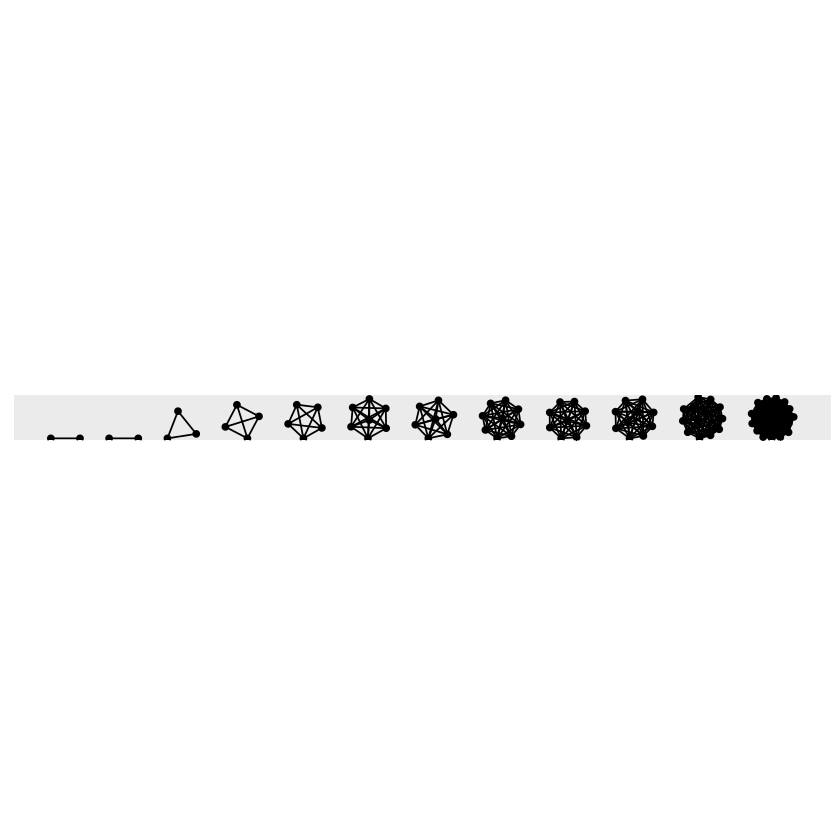

In [ ]:
ValoresCategoricos <- categorias
subconj <- combn(ValoresCategoricos, P)
Aristas <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(Aristas) <- c('V1', 'V2')
#Encontremos las parejas:

ValoresCategoricos <- subconj[,K] # Estos son las grupos de caracteristicas a comparar
CompararDatos <- Datos[, ValoresCategoricos]
rownames(CompararDatos) <- Datos$ID

for ( i in c(1:(length(Datos[,1])-1) ) ){
  for ( j in c((i+1):length(Datos[,1]) ) ){
    temp <- sum( (CompararDatos[i,] == CompararDatos[j,]), na.rm = TRUE)
    #aux <- c()
    if(  temp == P ){ # adiciona en aux si coincide en P caracteristicas
      #aux <- c(aux, Datos$Vota[i]== Datos$Vota[j])
      Aristas[nrow(Aristas) + 1,] = c(Datos$ID[i],Datos$ID[j])
      #TRUE si coinciden en Vota
    }
  }
}

library(igraph)
g <- graph_from_data_frame(Aristas, directed = FALSE, vertices = NULL)
#plot(g, vertex.size=6, vertex.label=NA)
autograph(g)


#Ahora con colores

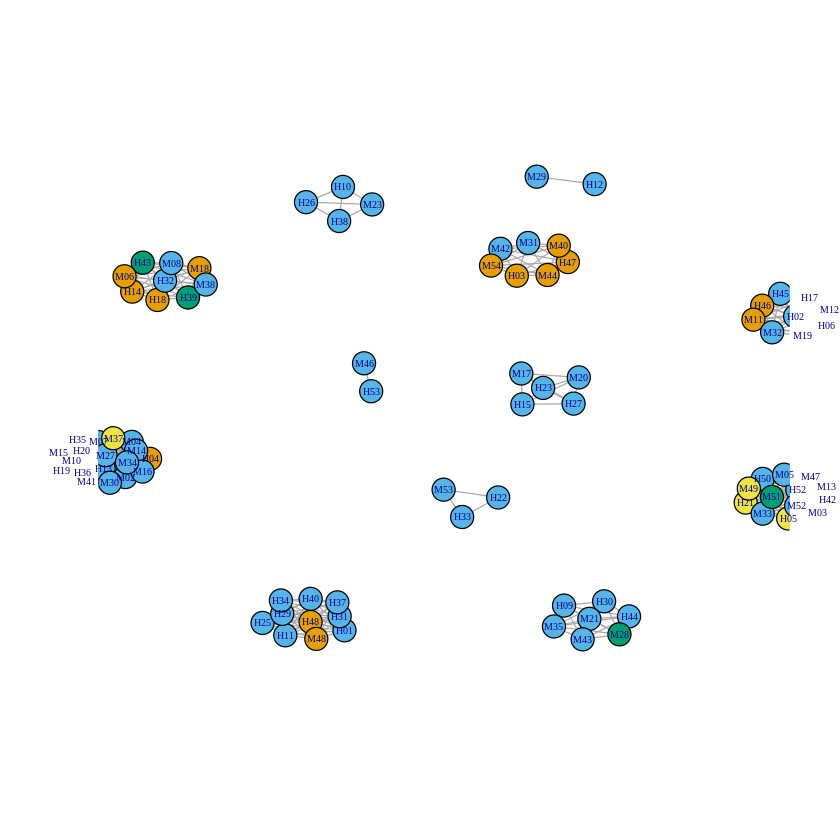

In [ ]:
Datos$Voto <- Datos$`TP 1. Interes en politica`
temp <- c()
# El color también se puede obtener de Datos$Grupos
for (i in c(1:length(V(g)$name))){
  temp[i] <- Datos$Voto[ which( V(g)$name[i] == Datos$ID) ]
}
V(g)$color <- temp
V(g)$label.cex = 0.5
plot(g, vertex.size=6, asp = 0.6,     margin = -0.2)


In [ ]:
Nombre_Categorias <- colnames(Datos)[subconj[,K]]
CompararDatos <- Datos[,c(1,16,21,subconj[,K])]
rownames(CompararDatos) <- Datos$ID
#write_csv(Datos, "Ganador_Promedio_Interes_En_Grupos.csv")
print(c("Nombre categorías: ", Nombre_Categorias))
print(paste("Personas en grupos:", length(V(g)), "de", nrow(Datos)))
for (i in c(1:length(Grupos))){
  print(paste("Grupo:", i))
  #for (j in c(1:length(Grupos[[i]]) )){
    temp <- Datos$ID %in% Grupos[[i]]
    print(Datos[temp,c(1,16,21,subconj[,K]) ] )
  #}
}

[1] "Nombre categorías: " "Ideología Pol"       "Vida Offline"       
[1] "Personas en grupos: 89 de 90"
[1] "Grupo: 1"
    ID TP 1. Interes en politica Grupo Ideología Pol Vida Offline
1  H01                         2     1     Presencia           NA
10 H11                         2     1     Presencia           NA
22 H25                         2     1     Presencia           NA
25 H29                         2     1     Presencia           NA
27 H31                         2     1     Presencia           NA
30 H34                         2     1     Presencia           NA
33 H37                         2     1     Presencia           NA
36 H40                         2     1     Presencia           NA
43 H48                         1     1     Presencia           NA
85 M48                         1     1     Presencia           NA
[1] "Grupo: 2"
    ID TP 1. Interes en politica Grupo Ideología Pol Vida Offline
2  H02                         2     2      Ausencia    Ocasional
6  H06 

#Grupos según vida offline e Ideología política por color

Warning message:
“Removed 1 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_count()`).”


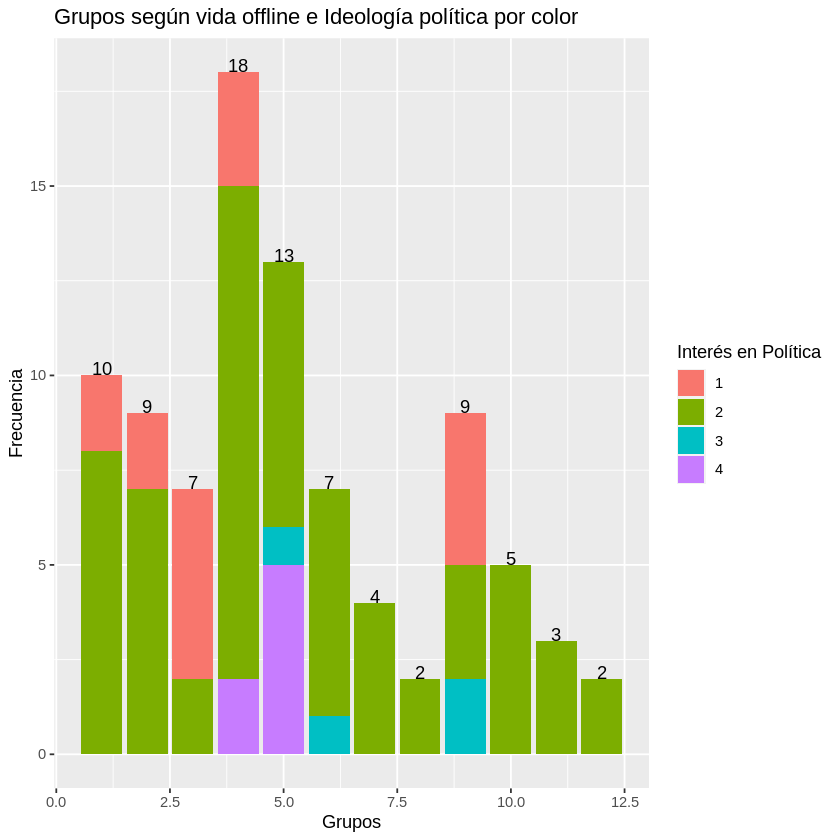

In [ ]:
p <- ggplot(Datos, aes(x=Grupo))+
  geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
  labs(title="Grupos según vida offline e Ideología política por color", y = "Frecuencia", x="Grupos")+
  geom_text(stat='count', aes(label=..count..), vjust=0 )+
  scale_fill_discrete(name = "Interés en Política", 
                      labels = as.character(c(1:length(Grupos))))

print(p)

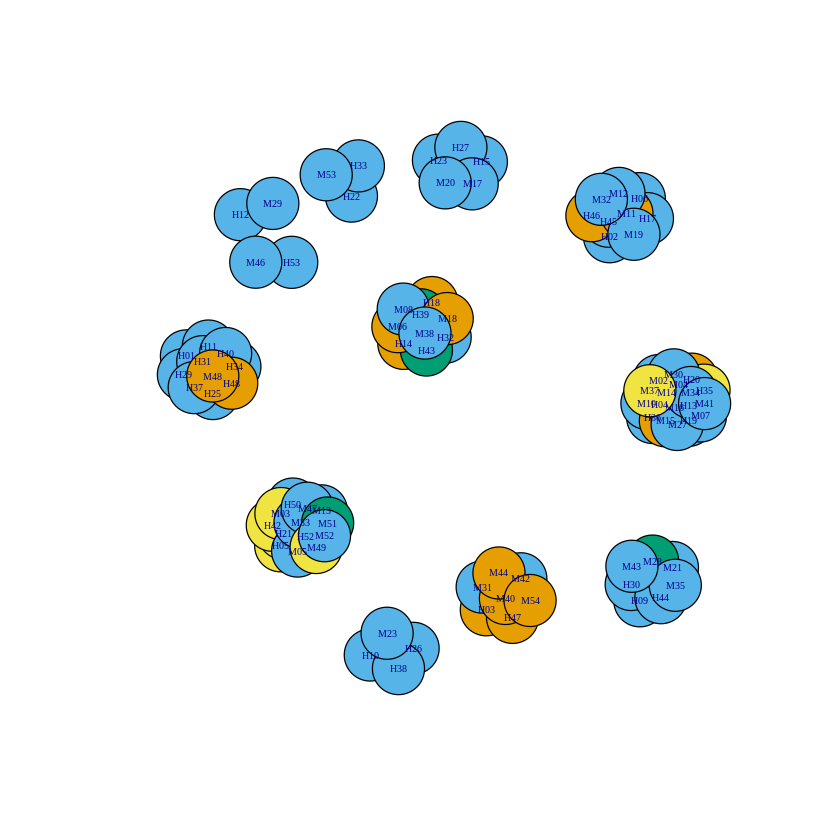

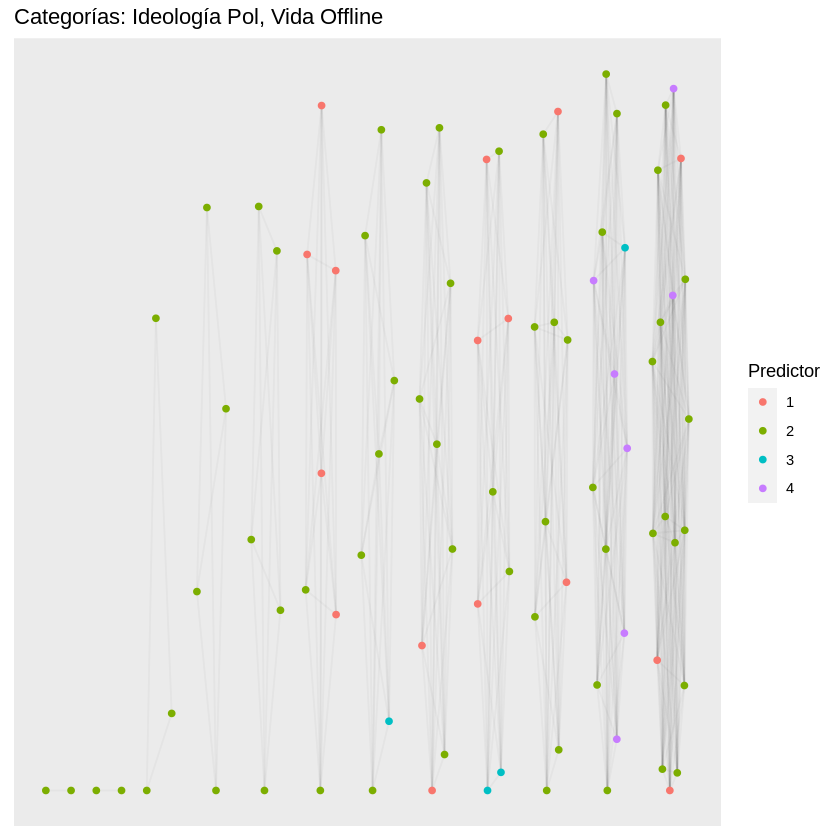

In [ ]:
l = c()
plot(g, vertex.size=20)
ggraph(g,'stress') + 
  geom_edge_link(alpha = 0.03) + 
  geom_node_point(aes(colour= factor(V(g)$color)))+
  labs(title = paste("Categorías:", toString(colnames(Datos)[subconj[,K]]) ), color = "Predictor")


#Ahora sociedad

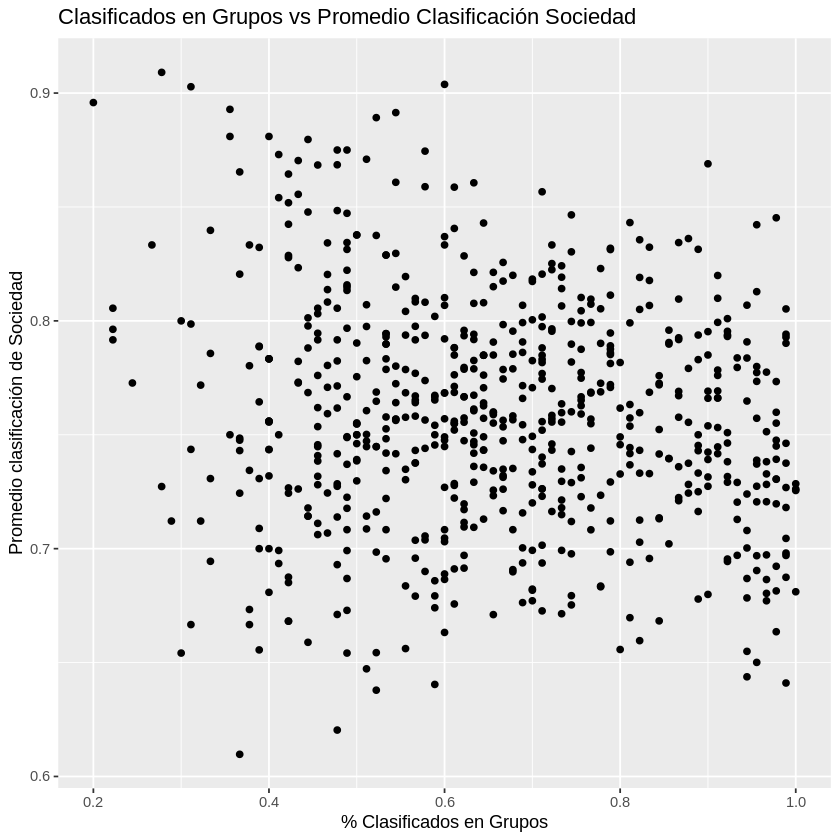

In [ ]:
Resumen$Clasificados_en_Grupos <- as.numeric(Resumen$Clasificados_en_Grupos)
Resumen$Mean_Prop_Sociedad <- as.numeric(Resumen$Mean_Prop_Sociedad)

ggplot(Resumen, aes() )  +  ggtitle("Clasificados en Grupos vs Promedio Clasificación Sociedad")+
  geom_point(aes(x = `Clasificados_en_Grupos`, y= Mean_Prop_Sociedad))+
  labs(y="Promedio clasificación de Sociedad",
       x="% Clasificados en Grupos")

In [ ]:
i <- c(which( 0.95 <= Resumen$Clasificados_en_Grupos ))
j <- which( max(Resumen$Mean_Prop_Sociedad[i]) == Resumen$Mean_Prop_Sociedad[i] )
print(i)
print(i[j])
i <- 48
#Mis notas dicen i =48

 [1]   4   5   9  11  30  31  32  33  34  35  36  38  39  43  44  45  47  48  50
[20]  55  56  57  58  59  61  62  66  67  68  69  71  72  77  78  80  85  86  88
[39]  93  95 101 111 335 345 411 435 466 490 520 528 535 571 599
[1] 48


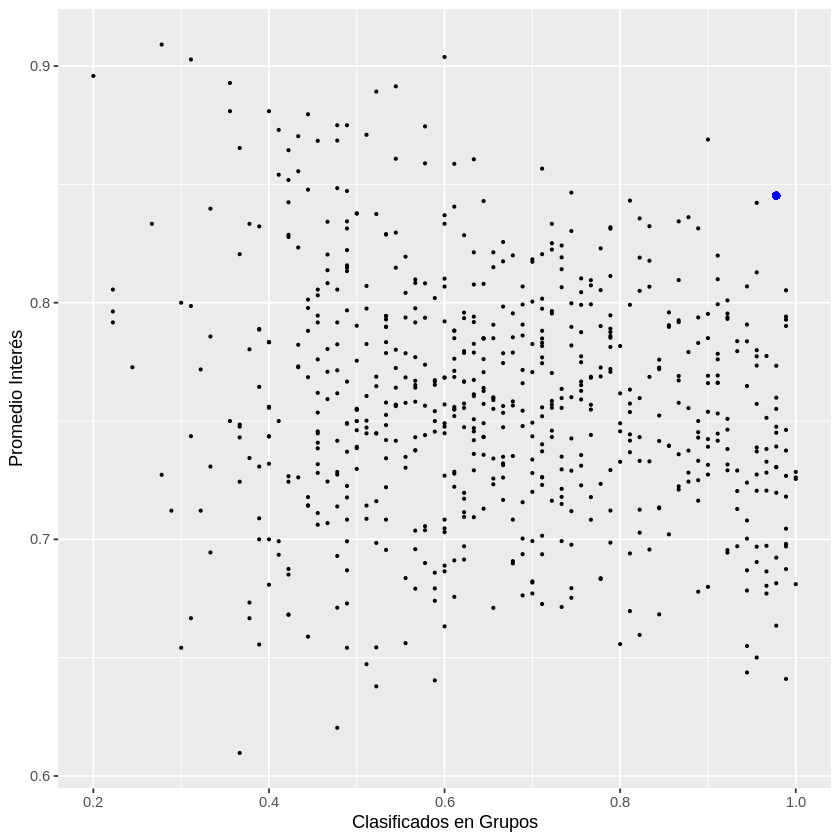

In [ ]:
a = Resumen$Clasificados_en_Grupos[i]
b = Resumen$Mean_Prop_Sociedad[i]


ggplot(Resumen, aes(Clasificados_en_Grupos, Mean_Prop_Sociedad)) + 
  geom_point(size = 0.5) + # change size and colour
  labs(y = "Promedio Interés", x = "Clasificados en Grupos")+
  geom_point(aes(x=a, y=b), col = "blue")

In [ ]:

Resumen[i,]

,N_Caracteristicas,K_Subconjunto,Grupos_esperados,Grupos_obtenido,Grupos,Max_Prop_Interes,Max_Prop_Sociedad,Max_Prop_Postura,Mean_Prop_Interes,Mean_Prop_Sociedad,Mean_Prop_Postura,Clasificados_en_Grupos
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
48,2,48,20,12,Contruccion,1,1,1,0.7705132,0.8452486,0.727272727272727,0.9777778


In [ ]:
print( c(Resumen$Mean_Prop_Sociedad[i],Resumen$Clasificados_en_Grupos[i] ) )

[1] 0.8452486 0.9777778


#Calculemos los grupos ganadores de sociedad

In [ ]:
P = 2
K = 48
ValoresCategoricos <- categorias
subconj <- combn(ValoresCategoricos, P)
colnames(Datos)[subconj[,K]]
Predecir <- c(16,17,18)  # Variables a predecir. 
categorias <- c(2:20)    # Todas las variabels.
categorias <- categorias[-match(Predecir, categorias)] # Quitamos las Predecir
ValoresCategoricos <- categorias
CompararDatos <- Datos[, subconj[,K]] #Datos a comparar
rownames(CompararDatos) <- Datos$ID
Grupos <- list(); tam_Groups <- c();
while (nrow(CompararDatos) > 0) {
  grupo_i = c(rownames(CompararDatos)[1])                         # Cada grupo
  temp <- CompararDatos[1,]             # Comparo con el primero
  CompararDatos <- CompararDatos[-1,]   # lo quito
  M <- nrow(CompararDatos)              # Cantidad de sujetos
  v <- c()                             # vector para quitar los añadidos
  if(M>0){
    for(i in c(1:M)){                   # lo comparo con todos los demas
      if (sum(temp == CompararDatos[i,], na.rm = T)==P){ # Si son iguales en todo
        grupo_i = c(grupo_i, rownames(CompararDatos)[i])           # lo añado al grupo
        #print(rownames(CompararDatos)[i])
        v <- c(v,i)
      }
    }
  }
  if(length(v)){CompararDatos <- CompararDatos[-v,]} # quito el añadido 
  Grupos[[ length(Grupos)+1 ]] <- grupo_i # Voy guardando los grupos
}


[1] "TIPO FAM 1"   "Vida Offline"

In [ ]:
table(Datos$`TIPO FAM 1`)


      Extensa Independiente            NA       Nuclear 
           28             1             6            55 

In [ ]:
table(Datos$`Vida Offline`)


Frecuente        NA      Nula Ocasional     Total 
       12        20        20        31         7 

#Quitamos los de un elemento

In [ ]:
j = 1
for (i in c(1:length(Grupos) )){
  if(length(Grupos[[j]]) == 1){
    Grupos <- Grupos[-j]
  }
  else{
    tam_Groups <- c(tam_Groups,length(Grupos[[j]]))
    j = j+1
  } 
}
Datos$Grupo <- NA
for (i in c(1:nrow(Datos))){
  for(j in c(1:length(Grupos) ) ){
    if (Datos$ID[i] %in% Grupos[[j]] ){
      #print(j)
      Datos$Grupo[i] <- j
    }
  }
}


#El grafo

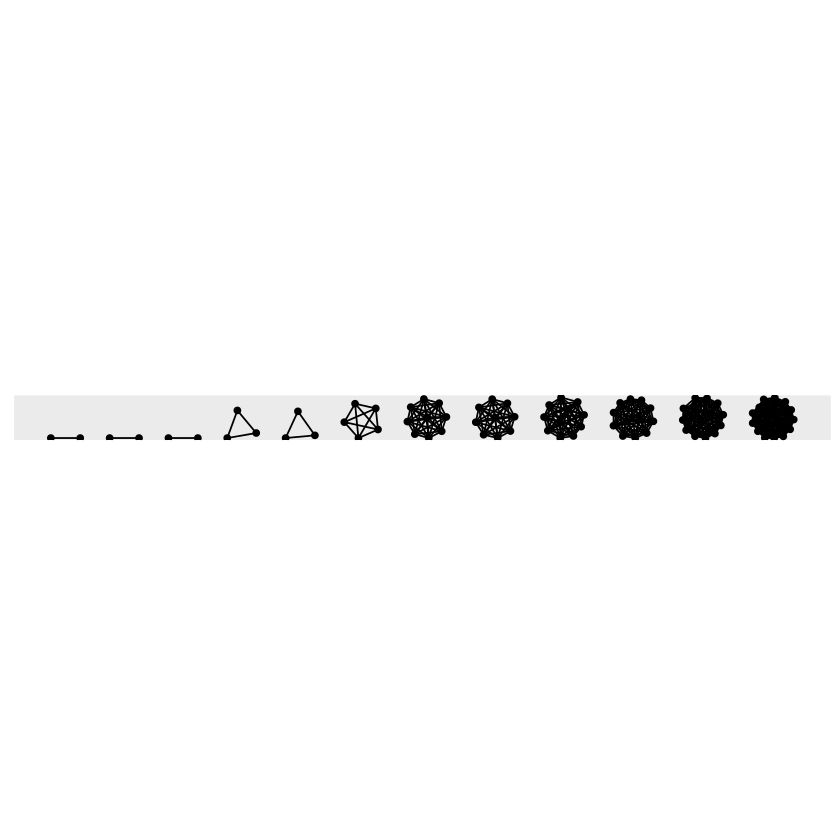

In [ ]:
ValoresCategoricos <- categorias
subconj <- combn(ValoresCategoricos, P)
Aristas <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(Aristas) <- c('V1', 'V2')
#Encontremos las parejas:

ValoresCategoricos <- subconj[,K] # Estos son las grupos de caracteristicas a comparar
CompararDatos <- Datos[, ValoresCategoricos]
rownames(CompararDatos) <- Datos$ID
#write_csv(CompararDatos, "Ganador_Interes.csv")
#
# Esto se puede optimizar de una manera distinta. 
#
for ( i in c(1:(length(Datos[,1])-1) ) ){
  for ( j in c((i+1):length(Datos[,1]) ) ){
    temp <- sum( (CompararDatos[i,] == CompararDatos[j,]), na.rm = TRUE)
    #aux <- c()
    if(  temp == P ){ # adiciona en aux si coincide en P caracteristicas
      #aux <- c(aux, Datos$Vota[i]== Datos$Vota[j])
      Aristas[nrow(Aristas) + 1,] = c(Datos$ID[i],Datos$ID[j])
      #TRUE si coinciden en Vota
    }
  }
}

library(igraph)
g <- graph_from_data_frame(Aristas, directed = FALSE, vertices = NULL)
#plot(g, vertex.size=6, vertex.label=NA)
autograph(g)


#Grafo con colores

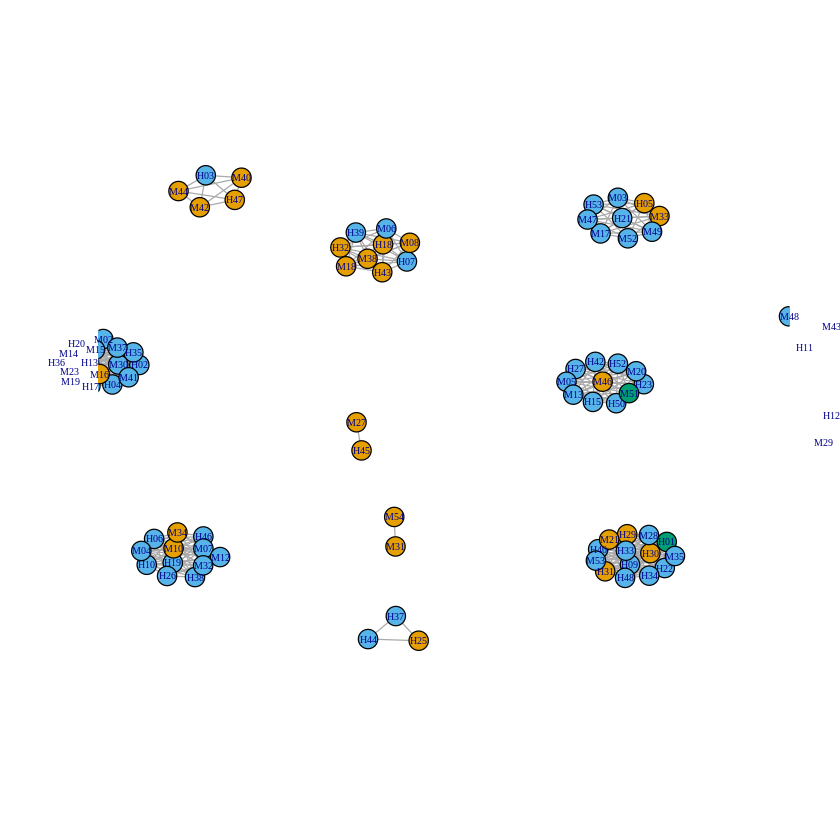

In [ ]:
Datos$Voto <- Datos$`TP 2. Sociedad actual`
temp <- c()
# El color también se puede obtener de Datos$Grupos
for (i in c(1:length(V(g)$name))){
  temp[i] <- Datos$Voto[ which( V(g)$name[i] == Datos$ID) ]
}
V(g)$color <- temp
V(g)$label.cex = 0.5
plot(g, vertex.size=5, asp = 0.6,     margin = -0.2)


In [ ]:
Nombre_Categorias <- colnames(Datos)[subconj[,K]]
CompararDatos <- Datos[,c(1,17,21,subconj[,K])]
rownames(CompararDatos) <- Datos$ID
write_csv(Datos, "Ganador_Promedio_Sociedad_En_Grupos.csv")


#Los grupos de sociedad

In [ ]:
print(c("Nombre categorías: ", Nombre_Categorias))
print(paste("Personas en grupos:", length(V(g)), "de", nrow(Datos)))
for (i in c(1:length(Grupos))){
  print(paste("Grupo:", i))
  #for (j in c(1:length(Grupos[[i]]) )){
  temp <- Datos$ID %in% Grupos[[i]]
  print(Datos[temp,c(1,17,21,subconj[,K]) ] )
  #}
}


[1] "Nombre categorías: " "TIPO FAM 1"          "Vida Offline"       
[1] "Personas en grupos: 88 de 90"
[1] "Grupo: 1"
    ID TP 2. Sociedad actual Grupo TIPO FAM 1 Vida Offline
1  H01                     3     1    Nuclear           NA
8  H09                     2     1    Nuclear           NA
20 H22                     2     1    Nuclear           NA
25 H29                     1     1    Nuclear           NA
26 H30                     1     1    Nuclear           NA
27 H31                     1     1    Nuclear           NA
29 H33                     2     1    Nuclear           NA
30 H34                     2     1    Nuclear           NA
36 H40                     2     1    Nuclear           NA
43 H48                     2     1    Nuclear           NA
65 M21                     1     1    Nuclear           NA
68 M28                     2     1    Nuclear           NA
75 M35                     2     1    Nuclear           NA
89 M53                     2     1    Nuclear         

Warning message:
“Removed 2 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_count()`).”


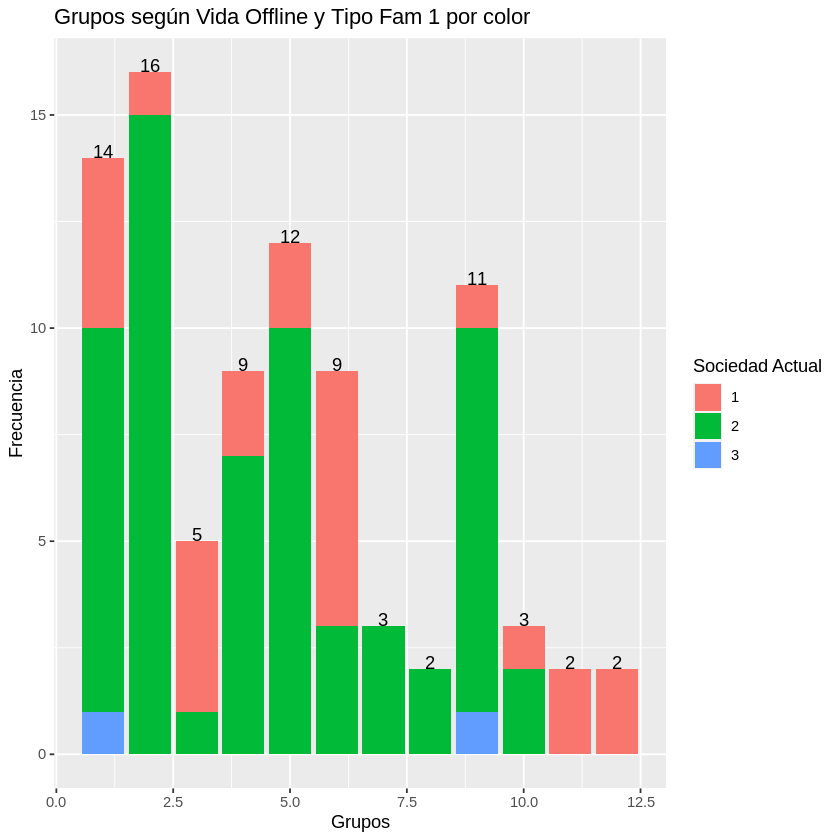

In [ ]:
p <- ggplot(Datos, aes(x=Grupo))+
  geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
  labs(title="Grupos según Vida Offline y Tipo Fam 1 por color", y = "Frecuencia", x="Grupos")+
  geom_text(stat='count', aes(label=..count..), vjust=0)+
  scale_fill_discrete(name = "Sociedad Actual", 
                      labels = as.character(c(1:length(Grupos))) )

print(p)


In [ ]:
ggraph(g,'stress') + 
  geom_edge_link(alpha = 0.03) + 
  geom_node_point(aes(colour= factor(V(g)$color)))+
  labs(title = paste("Categorías:", toString(colnames(Datos)[subconj[,K]]) ), color = "Predictor")


#Ahora sobre Postura política

In [ ]:
Resumen$Clasificados_en_Grupos <- as.numeric(Resumen$Clasificados_en_Grupos)
Resumen$Mean_Prop_Postura <- as.numeric(Resumen$Mean_Prop_Postura)

ggplot(Resumen, aes() )  +  ggtitle("Clasificados en Grupos vs Promedio Clasificación Postura")+
  geom_point(aes(x = `Clasificados_en_Grupos`, y= Mean_Prop_Postura))+
  labs(y="Promedio clasificación de Postura",
       x="% Clasificados en Grupos")


In [ ]:
i <- c(which( 0.98 <= Resumen$Clasificados_en_Grupos ))
j <- which( max(Resumen$Mean_Prop_Postura[i]) == Resumen$Mean_Prop_Postura[i] )
i <- i[j]
print(i)


[1] 69


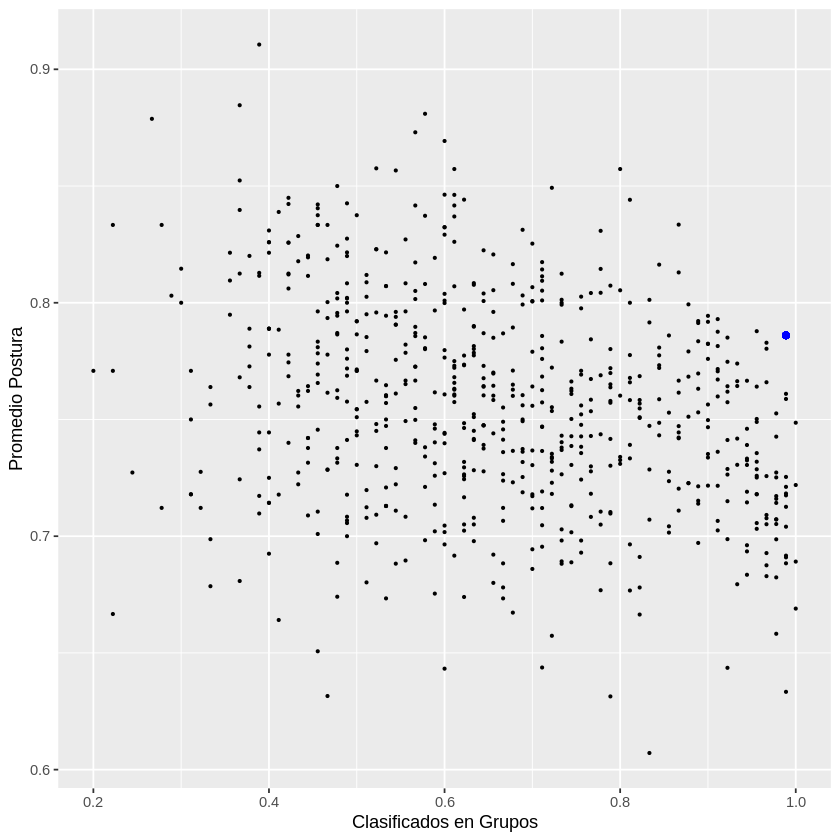

In [ ]:
a = Resumen$Clasificados_en_Grupos[i]
b = Resumen$Mean_Prop_Postura[i]

ggplot(Resumen, aes(Clasificados_en_Grupos, Mean_Prop_Postura)) + 
  geom_point(size = 0.5) + # change size and colour
  labs(y = "Promedio Postura", x = "Clasificados en Grupos")+
  #  geom_smooth()+
  #  geom_segment(aes(x = x_1, y = y_1, xend = x_2, yend = y_2), col = "red")+
  geom_point(aes(x=a, y=b), col = "blue")

In [ ]:
Resumen[i,]


,N_Caracteristicas,K_Subconjunto,Grupos_esperados,Grupos_obtenido,Grupos,Max_Prop_Interes,Max_Prop_Sociedad,Max_Prop_Postura,Mean_Prop_Interes,Mean_Prop_Sociedad,Mean_Prop_Postura,Clasificados_en_Grupos
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
69,2,69,15,12,Contruccion,1,1,1,0.6954696,0.7928444,0.7860602,0.9888889


#Calculemos los grupos

In [ ]:
P = 2
K = 69
ValoresCategoricos <- categorias
subconj <- combn(ValoresCategoricos, P)
colnames(Datos)[subconj[,K]]
Predecir <- c(16,17,18)  # Variables a predecir. 
categorias <- c(2:20)    # Todas las variabels.
categorias <- categorias[-match(Predecir, categorias)] # Quitamos las Predecir
ValoresCategoricos <- categorias
CompararDatos <- Datos[, subconj[,K]] #Datos a comparar
rownames(CompararDatos) <- Datos$ID
Grupos <- list(); tam_Groups <- c();
while (nrow(CompararDatos) > 0) {
  grupo_i = c(rownames(CompararDatos)[1])                         # Cada grupo
  temp <- CompararDatos[1,]             # Comparo con el primero
  CompararDatos <- CompararDatos[-1,]   # lo quito
  M <- nrow(CompararDatos)              # Cantidad de sujetos
  v <- c()                             # vector para quitar los añadidos
  if(M>0){
    for(i in c(1:M)){                   # lo comparo con todos los demas
      if (sum(temp == CompararDatos[i,], na.rm = T)==P){ # Si son iguales en todo
        grupo_i = c(grupo_i, rownames(CompararDatos)[i])           # lo añado al grupo
        #print(rownames(CompararDatos)[i])
        v <- c(v,i)
      }
    }
  }
  if(length(v)){CompararDatos <- CompararDatos[-v,]} # quito el añadido 
  Grupos[[ length(Grupos)+1 ]] <- grupo_i # Voy guardando los grupos
}


[1] "Part Fam Pol" "Vida Offline"

In [ ]:
table(Datos$`Part Fam Pol`)


NA No Sí 
33 16 41 

In [ ]:
table(Datos$`Vida Offline`)


Frecuente        NA      Nula Ocasional     Total 
       12        20        20        31         7 

In [ ]:
#Quitamos los de longitus 1
j = 1
for (i in c(1:length(Grupos) )){
  if(length(Grupos[[j]]) == 1){
    Grupos <- Grupos[-j]
  }
  else{
    tam_Groups <- c(tam_Groups,length(Grupos[[j]]))
    j = j+1
  } 
}


In [ ]:
Datos$Grupo <- NA
for (i in c(1:nrow(Datos))){
  for(j in c(1:length(Grupos) ) ){
    if (Datos$ID[i] %in% Grupos[[j]] ){
      #print(j)
      Datos$Grupo[i] <- j
    }
  }
}

#El Grafo

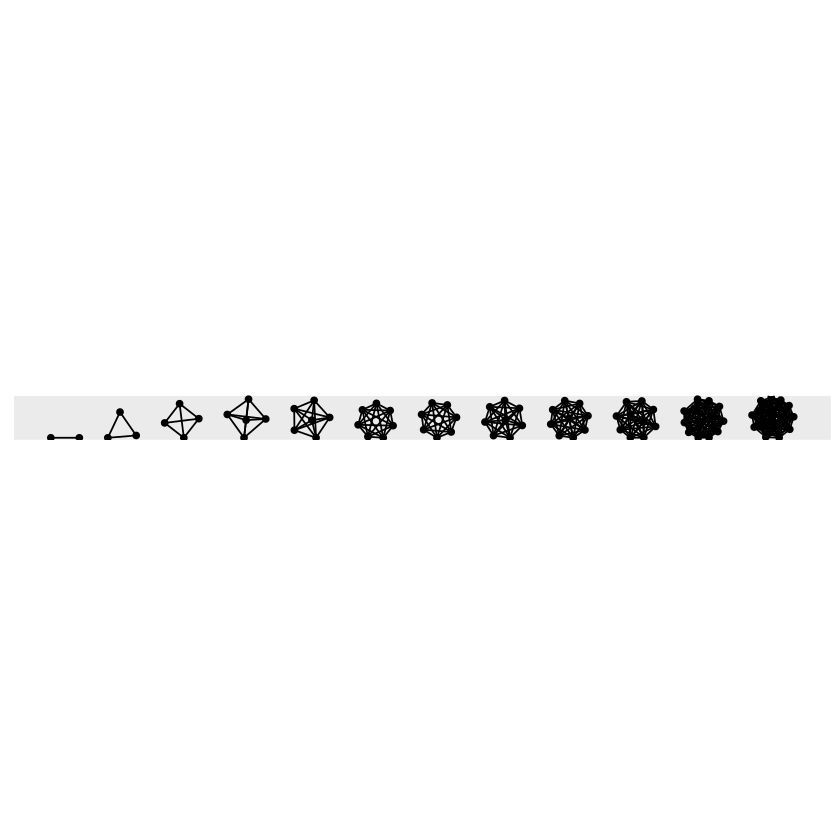

In [ ]:
ValoresCategoricos <- categorias
subconj <- combn(ValoresCategoricos, P)
Aristas <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(Aristas) <- c('V1', 'V2')
#Encontremos las parejas:

ValoresCategoricos <- subconj[,K] # Estos son las grupos de caracteristicas a comparar
CompararDatos <- Datos[, ValoresCategoricos]
rownames(CompararDatos) <- Datos$ID
#write_csv(CompararDatos, "Ganador_Interes.csv")
#
# Esto se puede optimizar de una manera distinta. 
#
for ( i in c(1:(length(Datos[,1])-1) ) ){
  for ( j in c((i+1):length(Datos[,1]) ) ){
    temp <- sum( (CompararDatos[i,] == CompararDatos[j,]), na.rm = TRUE)
    #aux <- c()
    if(  temp == P ){ # adiciona en aux si coincide en P caracteristicas
      #aux <- c(aux, Datos$Vota[i]== Datos$Vota[j])
      Aristas[nrow(Aristas) + 1,] = c(Datos$ID[i],Datos$ID[j])
      #TRUE si coinciden en Vota
    }
  }
}

library(igraph)
g <- graph_from_data_frame(Aristas, directed = FALSE, vertices = NULL)
#plot(g, vertex.size=6, vertex.label=NA)
autograph(g)


#Ahora con color

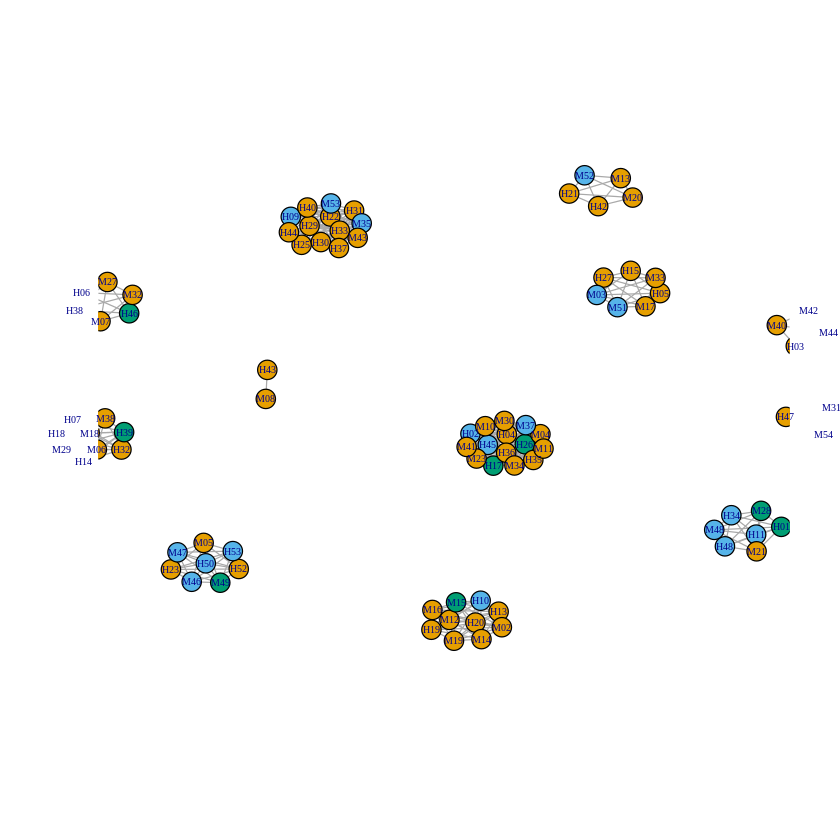

In [ ]:
Datos$Voto <- Datos$`TP 3. Postura politica`
temp <- c()
# El color también se puede obtener de Datos$Grupos
for (i in c(1:length(V(g)$name))){
  temp[i] <- Datos$Voto[ which( V(g)$name[i] == Datos$ID) ]
}
V(g)$color <- temp
V(g)$label.cex = 0.5
plot(g, vertex.size=5, asp = 0.6,     margin = -0.2)


In [ ]:
Nombre_Categorias <- colnames(Datos)[subconj[,K]]
CompararDatos <- Datos[,c(1,18,21,subconj[,K])]
rownames(CompararDatos) <- Datos$ID
write_csv(Datos, "Ganador_Promedio_Postura_En_Grupos.csv")


In [ ]:
print(c("Nombre categorías: ", Nombre_Categorias))
print(paste("Personas en grupos:", length(V(g)), "de", nrow(Datos)))
for (i in c(1:length(Grupos))){
  print(paste("Grupo:", i))
  #for (j in c(1:length(Grupos[[i]]) )){
  temp <- Datos$ID %in% Grupos[[i]]
  print(Datos[temp,c(1,18,21,subconj[,K]) ] )
  #}
}


[1] "Nombre categorías: " "Part Fam Pol"        "Vida Offline"       
[1] "Personas en grupos: 89 de 90"
[1] "Grupo: 1"
    ID TP 3. Postura politica Grupo Part Fam Pol Vida Offline
1  H01                      3     1           Sí           NA
10 H11                      2     1           Sí           NA
30 H34                      2     1           Sí           NA
43 H48                      2     1           Sí           NA
65 M21                      1     1           Sí           NA
68 M28                      3     1           Sí           NA
85 M48                      2     1           Sí           NA
[1] "Grupo: 2"
    ID TP 3. Postura politica Grupo Part Fam Pol Vida Offline
2  H02                      2     2           Sí    Ocasional
4  H04                      1     2           Sí    Ocasional
15 H17                      3     2           Sí    Ocasional
23 H26                      3     2           Sí    Ocasional
31 H35                      1     2           Sí    Ocasion

Warning message:
“Removed 1 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_count()`).”


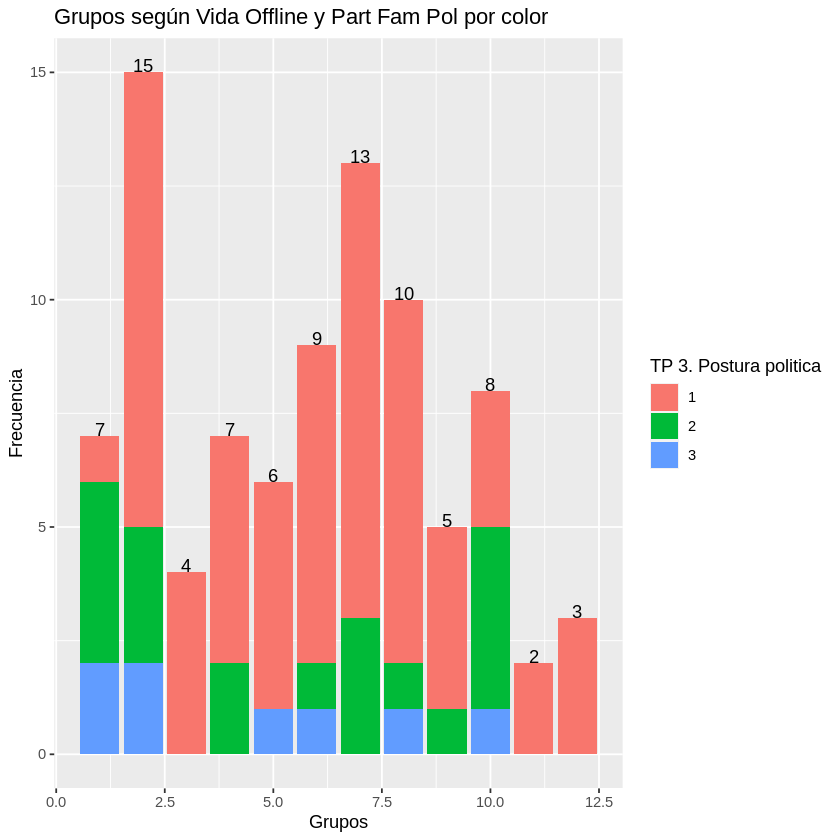

In [ ]:
p <- ggplot(Datos, aes(x=Grupo))+
  geom_bar(stat="count",  aes(fill=as.factor(Voto)))+
  labs(title="Grupos según Vida Offline y Part Fam Pol por color", y = "Frecuencia", x="Grupos")+
  geom_text(stat='count', aes(label=..count..), vjust=0)+
  scale_fill_discrete(name = name_temp, 
                      labels = as.character(c(1:length(Grupos))) )
print(p)

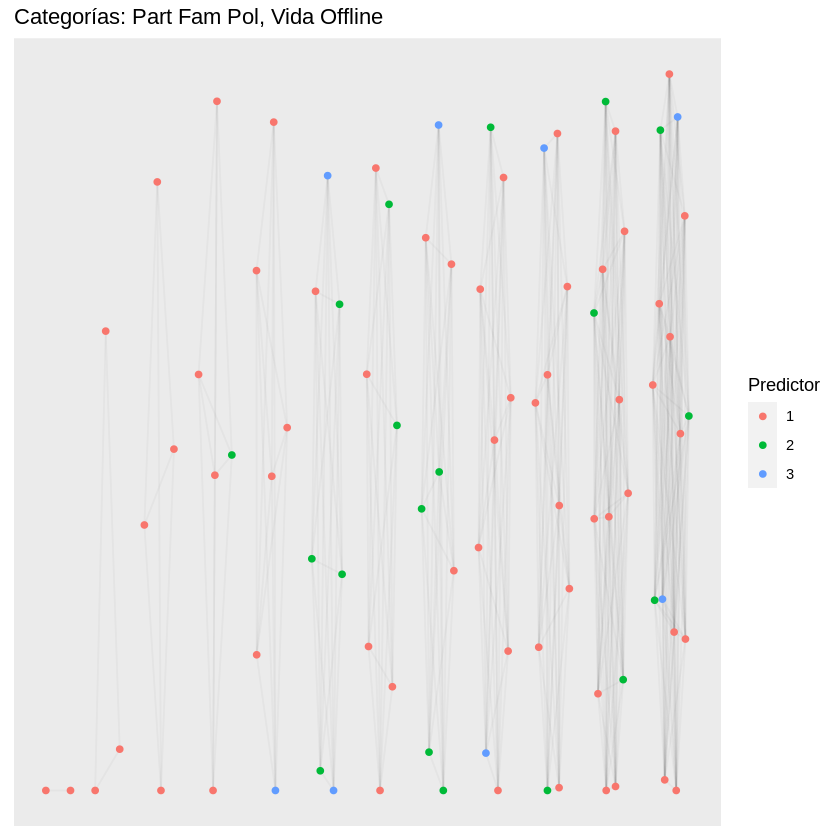

In [ ]:
ggraph(g,'stress') + 
  geom_edge_link(alpha = 0.03) + 
  geom_node_point(aes(colour= factor(V(g)$color)))+
  labs(title = paste("Categorías:", toString(colnames(Datos)[subconj[,K]]) ), color = "Predictor")
